# Feature engineering 


On veut faire une régression linéaire pour prédire le prix d'un bien immobilier à partir de ses caractéristiques. On dispose d'un dataset contenant plusieurs caractéristiques : size (mètre carré), orientation, etc. 



In [1]:
#pip install seaborn

In [2]:
 #pip install graphviz

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
import graphviz
import seaborn as sns
sns.set_style("whitegrid")

In [4]:
df=pd.read_csv("house_price_data_4.csv")
df

,size,bed room,Orientation,price,before_six_month
0,100,3,Sud,345000,yes
1,80,2,Ouest,280000,yes
2,30,0,Nord,130000,no
3,45,1,Est,140000,yes
4,50,1,NaN,170000,no
5,60,1,Ouest,200000,no
6,90,3,Est,330000,yes
7,110,3,Est,400000,no
8,154,5,Nord,550000,no
9,70,2,Sud,260000,yes


In [5]:
df.describe()
df

,size,bed room,Orientation,price,before_six_month
0,100,3,Sud,345000,yes
1,80,2,Ouest,280000,yes
2,30,0,Nord,130000,no
3,45,1,Est,140000,yes
4,50,1,NaN,170000,no
5,60,1,Ouest,200000,no
6,90,3,Est,330000,yes
7,110,3,Est,400000,no
8,154,5,Nord,550000,no
9,70,2,Sud,260000,yes


In [6]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   size              17 non-null     int64 
 1   bed room          17 non-null     int64 
 2   Orientation       15 non-null     object
 3   price             17 non-null     int64 
 4   before_six_month  17 non-null     object
dtypes: int64(3), object(2)
memory usage: 808.0+ bytes


In [7]:
df[["size"]]

,size
0,100
1,80
2,30
3,45
4,50
5,60
6,90
7,110
8,154
9,70


Histogramme des valeurs

C:\Users\Maaximaag\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


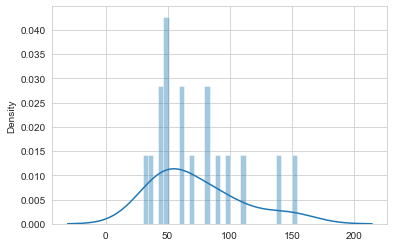

In [8]:
sns.distplot(df[["size"]],bins=30)

Normalisation de la colonne size avec la méthode min max scaler 

In [9]:
x_min, x_max = df["size"].min(),df["size"].max()
print(x_min, x_max)

x=df[["size"]]
x

30 154


,size
0,100
1,80
2,30
3,45
4,50
5,60
6,90
7,110
8,154
9,70


In [10]:
normalized = ((x-x_min)/(x_max-x_min))
normalized


,size
0,0.564516
1,0.403226
2,0.000000
3,0.120968
4,0.161290
5,0.241935
6,0.483871
7,0.645161
8,1.000000
9,0.322581


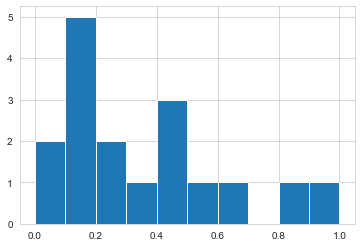

In [11]:
plt.hist(normalized["size"])
plt.show()

Normalisation avec la méthode standard scaler

[[ 0.76749132]
 [ 0.18760899]
 [-1.26209684]
 [-0.82718509]
 [-0.68221451]
 [-0.39227334]
 [ 0.47755016]
 [ 1.05743249]
 [ 2.33317362]
 [-0.10233218]
 [-0.68221451]
 [-1.03014391]
 [ 0.18760899]
 [-0.68221451]
 [-0.88517332]
 [-0.39227334]
 [ 1.92725599]]


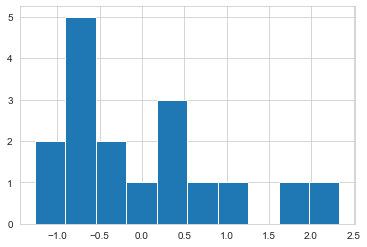

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(scaler.fit_transform(x))
StandardScaler(copy=True, with_mean=True, with_std=True)
plt.hist(scaler.fit_transform(x))
plt.show()

In [13]:
y=df[["Orientation"]]
y

,Orientation
0,Sud
1,Ouest
2,Nord
3,Est
4,NaN
5,Ouest
6,Est
7,Est
8,Nord
9,Sud


Méthode one-hot encoding 

In [14]:
z=pd.get_dummies(y)
z


,Orientation_Est,Orientation_Nord,Orientation_Nord-Est,Orientation_Ouest,Orientation_Sud,Orientation_Sud-Ouest
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,0
5,0,0,0,1,0,0
6,1,0,0,0,0,0
7,1,0,0,0,0,0
8,0,1,0,0,0,0
9,0,0,0,0,1,0


In [15]:
data=pd.concat([df,z], axis=1)
#data
data.drop("Orientation", axis=1)

,size,bed room,price,before_six_month,Orientation_Est,Orientation_Nord,Orientation_Nord-Est,Orientation_Ouest,Orientation_Sud,Orientation_Sud-Ouest
0,100,3,345000,yes,0,0,0,0,1,0
1,80,2,280000,yes,0,0,0,1,0,0
2,30,0,130000,no,0,1,0,0,0,0
3,45,1,140000,yes,1,0,0,0,0,0
4,50,1,170000,no,0,0,0,0,0,0
5,60,1,200000,no,0,0,0,1,0,0
6,90,3,330000,yes,1,0,0,0,0,0
7,110,3,400000,no,1,0,0,0,0,0
8,154,5,550000,no,0,1,0,0,0,0
9,70,2,260000,yes,0,0,0,0,1,0


 Algorithme de régression linéaire 

In [16]:
sorted_df=data.sort_values(by=['size'])
sorted_df

,size,bed room,Orientation,price,before_six_month,Orientation_Est,Orientation_Nord,Orientation_Nord-Est,Orientation_Ouest,Orientation_Sud,Orientation_Sud-Ouest
2,30,0,Nord,130000,no,0,1,0,0,0,0
11,38,1,Sud,180000,yes,0,0,0,0,1,0
14,43,1,Nord-Est,145000,yes,0,0,1,0,0,0
3,45,1,Est,140000,yes,1,0,0,0,0,0
4,50,1,NaN,170000,no,0,0,0,0,0,0
10,50,2,Est,240000,no,1,0,0,0,0,0
13,50,1,Sud-Ouest,170000,yes,0,0,0,0,0,1
5,60,1,Ouest,200000,no,0,0,0,1,0,0
15,60,2,NaN,210000,no,0,0,0,0,0,0
9,70,2,Sud,260000,yes,0,0,0,0,1,0


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

x=data[["size","Orientation_Est","Orientation_Nord","Orientation_Nord-Est","Orientation_Ouest","Orientation_Sud-Ouest"]]
y=data["price"]

model=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y)
model.fit(x_train,y_train)

x_test_sorted = x_test.sort_values(by=['size']) 
x_test_sorted


model_predicted=model.predict(x_test_sorted)
#model_predicted

X=x.sort_values(by=["size"])
#X
Y=model.predict(X)
#Y

In [18]:
x_test_sorted

,size,Orientation_Est,Orientation_Nord,Orientation_Nord-Est,Orientation_Ouest,Orientation_Sud-Ouest
2,30,0,1,0,0,0
11,38,0,0,0,0,0
14,43,0,0,1,0,0
3,45,1,0,0,0,0
16,140,0,1,0,0,0


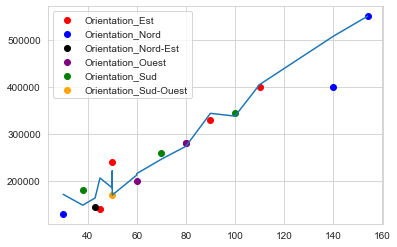

In [19]:
plt.scatter(df["size"][z["Orientation_Est"] == 1],df["price"][z["Orientation_Est"] == 1],c="red", label="Orientation_Est")
plt.scatter(df["size"][z["Orientation_Nord"] == 1],df["price"][z["Orientation_Nord"] == 1],c="blue", label="Orientation_Nord")
plt.scatter(df["size"][z["Orientation_Nord-Est"] == 1],df["price"][z["Orientation_Nord-Est"] == 1],c="black", label="Orientation_Nord-Est")
plt.scatter(df["size"][z["Orientation_Ouest"] == 1],df["price"][z["Orientation_Ouest"] == 1],c="purple", label="Orientation_Ouest")
plt.scatter(df["size"][z["Orientation_Sud"] == 1],df["price"][z["Orientation_Sud"] == 1],c="green", label="Orientation_Sud")
plt.scatter(df["size"][z["Orientation_Sud-Ouest"] == 1],df["price"][z["Orientation_Sud-Ouest"] == 1],c="orange", label="Orientation_Sud-Ouest")
plt.legend()
plt.plot(X["size"],Y)
plt.show()

Le coefficient de détermination

In [20]:
#calcul du R²
R=r2_score(y,Y)
R
#Le tri par ordre croissant rendra la valeur positive


-1.1285806332358783


# Classification

On va faire une tâche similaire et on va tenter de classifier si une maison se vend en moins de six mois ou en plus de six mois avec le dataset house prediction 3


Arbre de décision sur le dataset tel quel

In [21]:
df2=pd.read_csv("house_price_data_3.csv")
df2

,size,bed room,Orientation,price
0,100,3,Sud,345000
1,80,2,Ouest,280000
2,30,0,Nord,130000
3,45,1,Est,140000
4,50,1,NaN,170000
5,60,1,Ouest,200000
6,90,3,Est,330000
7,110,3,Est,400000
8,154,5,Nord,550000
9,70,2,Sud,260000


In [22]:
df2.fillna(0)

,size,bed room,Orientation,price
0,100,3,Sud,345000
1,80,2,Ouest,280000
2,30,0,Nord,130000
3,45,1,Est,140000
4,50,1,0,170000
5,60,1,Ouest,200000
6,90,3,Est,330000
7,110,3,Est,400000
8,154,5,Nord,550000
9,70,2,Sud,260000


In [23]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

c = le.fit_transform(df["Orientation"].astype(str))
df["Orientation"] = c
df["Orientation"]

0     4
1     3
2     1
3     0
4     6
5     3
6     0
7     0
8     1
9     4
10    0
11    4
12    3
13    5
14    2
15    6
16    1
Name: Orientation, dtype: int32

In [24]:
d=le.fit_transform(df["before_six_month"].astype(str))
d

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1])

In [25]:
treemodel = DecisionTreeClassifier()
y=treemodel.fit(df[["size", "price","Orientation","bed room"]], df["before_six_month"])
y

DecisionTreeClassifier()

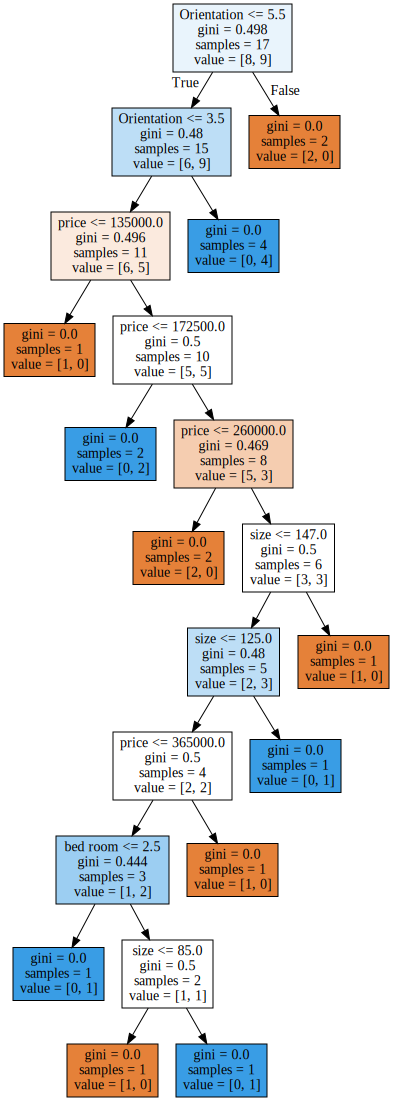

In [26]:
prev = tree.export_graphviz(treemodel, feature_names=["size", "price","Orientation","bed room"], filled = True)  
arb = graphviz.Source(prev)  
arb 

One hot encoding de la colonne orientation du dataset house_price_data_4

In [27]:
df3=pd.read_csv("house_price_data_4.csv")
df3

,size,bed room,Orientation,price,before_six_month
0,100,3,Sud,345000,yes
1,80,2,Ouest,280000,yes
2,30,0,Nord,130000,no
3,45,1,Est,140000,yes
4,50,1,NaN,170000,no
5,60,1,Ouest,200000,no
6,90,3,Est,330000,yes
7,110,3,Est,400000,no
8,154,5,Nord,550000,no
9,70,2,Sud,260000,yes


In [28]:
#One hot encoding
O=pd.get_dummies(df3["Orientation"],prefix="Orientation")
O

,Orientation_Est,Orientation_Nord,Orientation_Nord-Est,Orientation_Ouest,Orientation_Sud,Orientation_Sud-Ouest
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,0
5,0,0,0,1,0,0
6,1,0,0,0,0,0
7,1,0,0,0,0,0
8,0,1,0,0,0,0
9,0,0,0,0,1,0


In [29]:
cont=pd.concat([df3,O], axis=1)
cont

,size,bed room,Orientation,price,before_six_month,Orientation_Est,Orientation_Nord,Orientation_Nord-Est,Orientation_Ouest,Orientation_Sud,Orientation_Sud-Ouest
0,100,3,Sud,345000,yes,0,0,0,0,1,0
1,80,2,Ouest,280000,yes,0,0,0,1,0,0
2,30,0,Nord,130000,no,0,1,0,0,0,0
3,45,1,Est,140000,yes,1,0,0,0,0,0
4,50,1,NaN,170000,no,0,0,0,0,0,0
5,60,1,Ouest,200000,no,0,0,0,1,0,0
6,90,3,Est,330000,yes,1,0,0,0,0,0
7,110,3,Est,400000,no,1,0,0,0,0,0
8,154,5,Nord,550000,no,0,1,0,0,0,0
9,70,2,Sud,260000,yes,0,0,0,0,1,0


In [30]:
cont.dropna()

,size,bed room,Orientation,price,before_six_month,Orientation_Est,Orientation_Nord,Orientation_Nord-Est,Orientation_Ouest,Orientation_Sud,Orientation_Sud-Ouest
0,100,3,Sud,345000,yes,0,0,0,0,1,0
1,80,2,Ouest,280000,yes,0,0,0,1,0,0
2,30,0,Nord,130000,no,0,1,0,0,0,0
3,45,1,Est,140000,yes,1,0,0,0,0,0
5,60,1,Ouest,200000,no,0,0,0,1,0,0
6,90,3,Est,330000,yes,1,0,0,0,0,0
7,110,3,Est,400000,no,1,0,0,0,0,0
8,154,5,Nord,550000,no,0,1,0,0,0,0
9,70,2,Sud,260000,yes,0,0,0,0,1,0
10,50,2,Est,240000,no,1,0,0,0,0,0


In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cont["Orientation"] = le.fit_transform(cont["Orientation"].astype(str))
cont["Orientation"]

0     4
1     3
2     1
3     0
4     6
5     3
6     0
7     0
8     1
9     4
10    0
11    4
12    3
13    5
14    2
15    6
16    1
Name: Orientation, dtype: int32

In [32]:
treemodel2 = DecisionTreeClassifier()
y=treemodel2.fit(cont[["size", "price","Orientation","bed room"]],cont["before_six_month"])


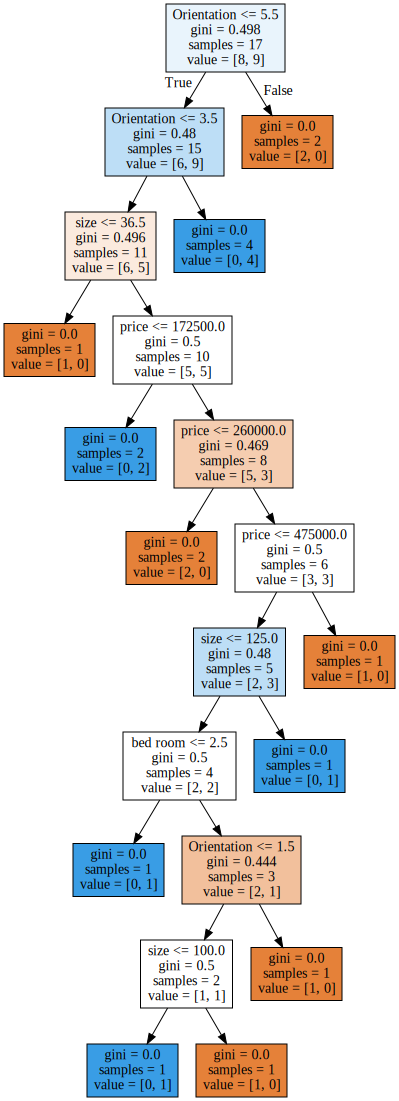

In [33]:
arb2 = tree.export_graphviz(treemodel2, feature_names=["size", "price","Orientation","bed room"], filled = True)  
graph2 = graphviz.Source(arb2)  
graph2